In [0]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 


In [4]:
df = pd.read_csv("/content/creditcard.csv")
#looking how data looks
df.head()
# Credits to Leonardo Ferreira --> https://www.kaggle.com/kabure/credit-card-fraud-prediction-rf-smote

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
#looking the type and searching for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217924 entries, 0 to 217923
Data columns (total 31 columns):
Time      217924 non-null float64
V1        217924 non-null float64
V2        217924 non-null float64
V3        217923 non-null float64
V4        217923 non-null float64
V5        217923 non-null float64
V6        217923 non-null float64
V7        217923 non-null float64
V8        217923 non-null float64
V9        217923 non-null float64
V10       217923 non-null float64
V11       217923 non-null float64
V12       217923 non-null float64
V13       217923 non-null float64
V14       217923 non-null float64
V15       217923 non-null float64
V16       217923 non-null float64
V17       217923 non-null float64
V18       217923 non-null float64
V19       217923 non-null float64
V20       217923 non-null float64
V21       217923 non-null float64
V22       217923 non-null float64
V23       217923 non-null float64
V24       217923 non-null float64
V25       217923 non-null float64
V26  

In [7]:
# look for the "normal" columns
df[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,217924.000000,217923.000000,217923.000000
mean,76123.548641,90.443085,0.001849
std,37894.462317,249.605534,0.042964
min,0.000000,0.000000,0.000000
25%,46470.000000,6.000000,0.000000
50%,71155.000000,23.270000,0.000000
75%,115941.250000,79.900000,0.000000
max,141096.000000,19656.530000,1.000000


Distribuition of No fraud(0) and Frauds(1): 
0.0    217520
1.0       403
Name: Class, dtype: int64


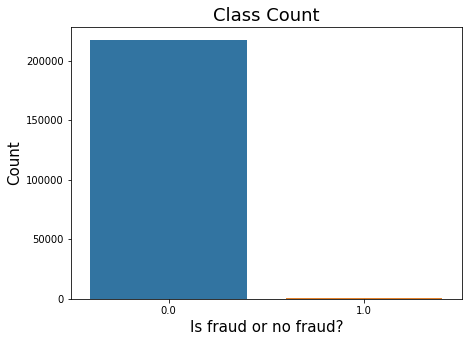

In [9]:
#Lets start looking the difference by Normal and Fraud transactions
print("Distribuition of No fraud(0) and Frauds(1): ")
print(df["Class"].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Is fraud or no fraud?", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

In [0]:
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)
df['Time_hour'] = (timedelta.dt.components.hours).astype(int)

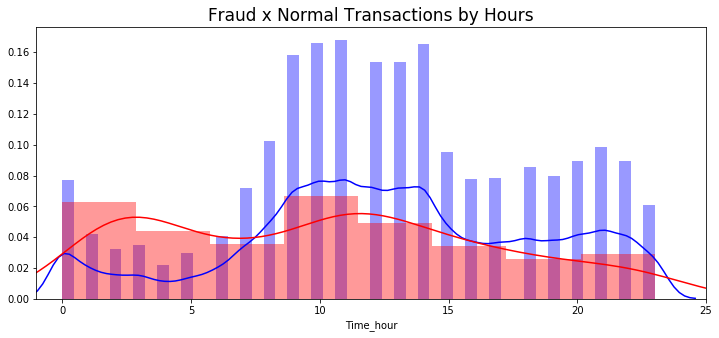

In [17]:
#Exploring the distribuition by Class types through hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(df[df['Class'] == 0]["Time_hour"], 
             color='b')
sns.distplot(df[df['Class'] == 1]["Time_hour"], 
             color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

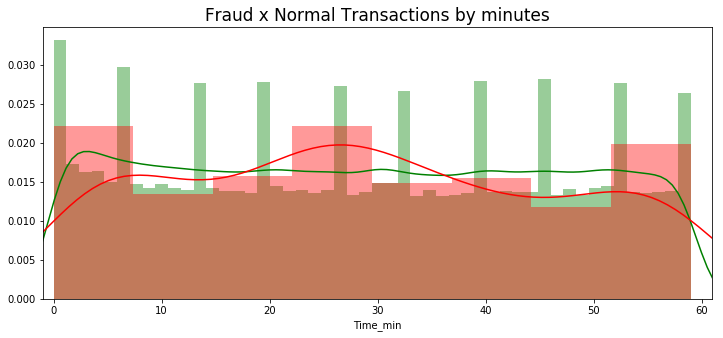

In [19]:
#Exploring the distribuition by Class types through hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(df[df['Class'] == 0]["Time_min"], 
             color='g')
sns.distplot(df[df['Class'] == 1]["Time_min"], 
             color='r')
plt.title('Fraud x Normal Transactions by minutes', fontsize=17)
plt.xlim([-1,61])
plt.show()

In [21]:
#To clearify the data of frauds and no frauds
df_fraud = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0]

print("Fraud transaction statistics")
print(df_fraud["Amount"].describe())
print("\nNormal transaction statistics")
print(df_normal["Amount"].describe())

Fraud transaction statistics
count     403.000000
mean      125.873325
std       258.859233
min         0.000000
25%         1.000000
50%        14.460000
75%       106.270000
max      2125.870000
Name: Amount, dtype: float64

Normal transaction statistics
count    217520.000000
mean         90.377443
std         249.584021
min           0.000000
25%           6.000000
50%          23.280000
75%          79.850000
max       19656.530000
Name: Amount, dtype: float64


In [0]:
#filter the values to look for Amount by Class - by 3.000
#Feature engineering to a better visualization of the values
df['Amount_log'] = np.log(df.Amount + 0.01)


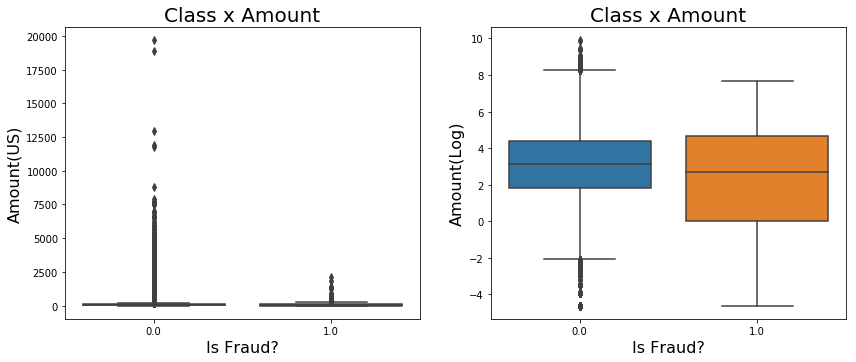

In [23]:
plt.figure(figsize=(14,6))
# exploring the Amount by Class and checking the distribuition of Amount transactions
plt.subplot(121)
ax = sns.boxplot(x ="Class",y="Amount", data=df)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount(US)", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x ="Class",y="Amount_log", data=df)
ax1.set_title("Class x Amount", fontsize=20)
ax1.set_xlabel("Is Fraud?", fontsize=16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

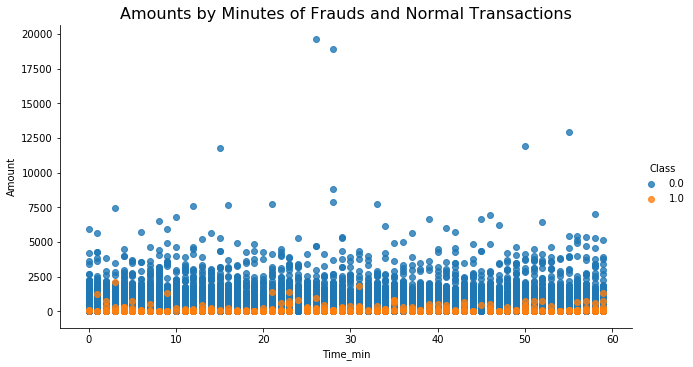

In [24]:
#Looking the Amount and time distribuition of FRAUD transactions
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,
                data=df, hue='Class')
plt.title("Amounts by Minutes of Frauds and Normal Transactions",fontsize=16)
plt.show()

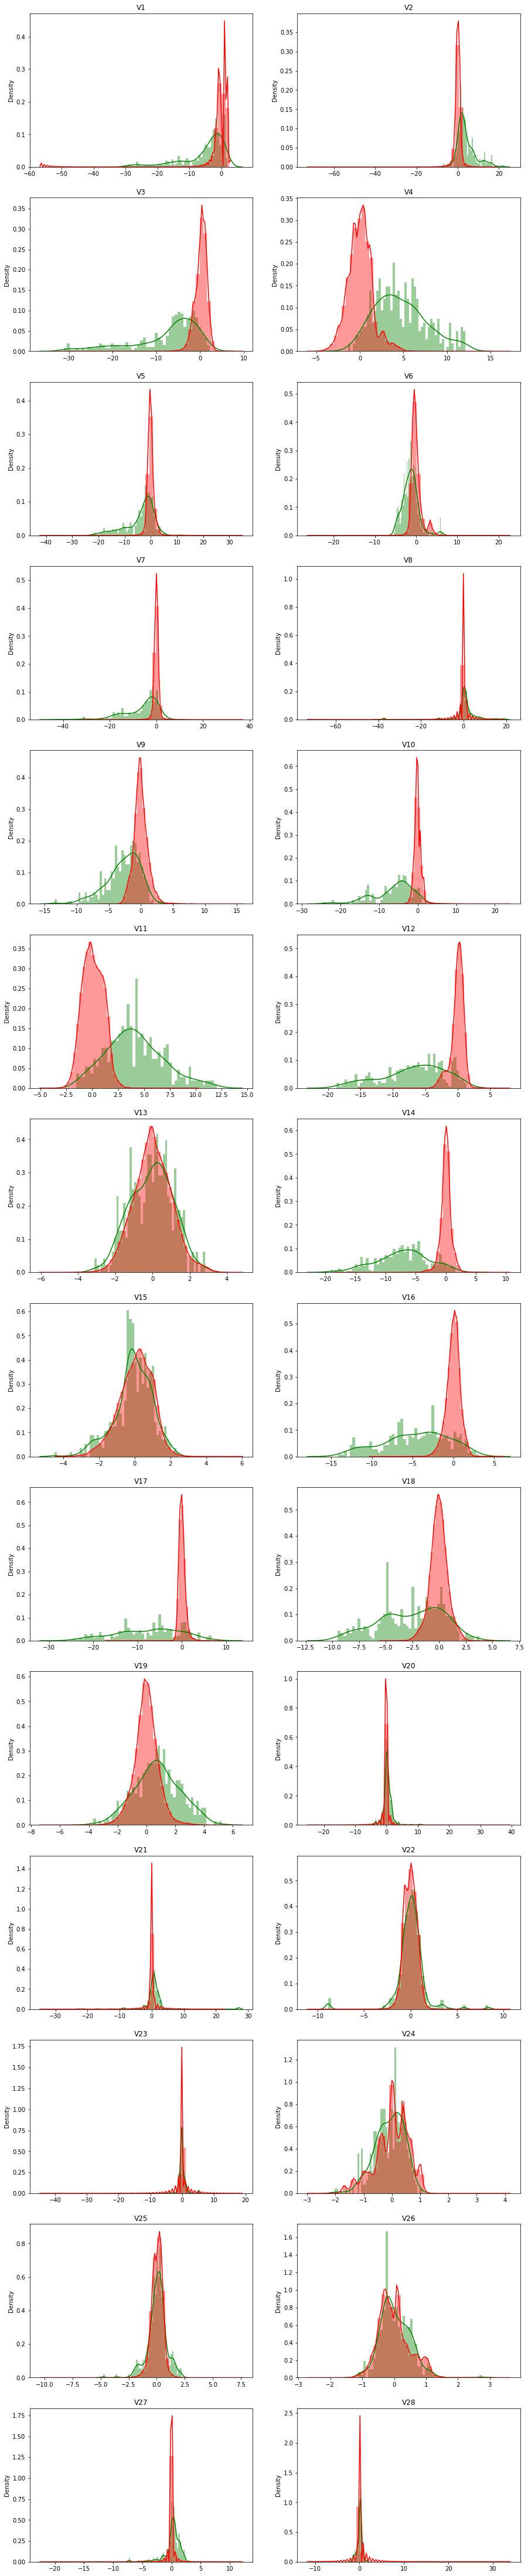

In [26]:
#Looking the V's features
columns = df.iloc[:,1:29].columns

frauds = df.Class == 1
normals = df.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][frauds], bins = 50, color='g') #Will receive the "semi-salmon" violin
    sns.distplot(df[col][normals], bins = 50, color='r') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

In [0]:
#selecting the variables where fraud class have an interesting behavior and  can help us predict

df = df[["Time_hour","Time_min","V2","V3","V4","V9","V10","V11","V12","V14","V16","V17","V18","V19","V27","Amount","Class"]]

In [30]:
# feature engg
df.Amount = np.log(df.Amount + 0.001)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


,Time_hour,Time_min,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19,V27,Amount,Class
0,0,0,-0.072781,2.536347,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.133558,1.611257,0.0
1,0,0,0.266151,0.166480,0.448154,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.008983,-0.009129,0.0
2,0,0,-1.340163,1.773209,0.379780,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,-0.055353,1.781312,0.0
3,0,0,-0.185226,1.792993,-0.863291,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,0.062723,1.572203,0.0
4,0,0,0.877737,1.548718,0.403034,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.219422,1.446770,0.0


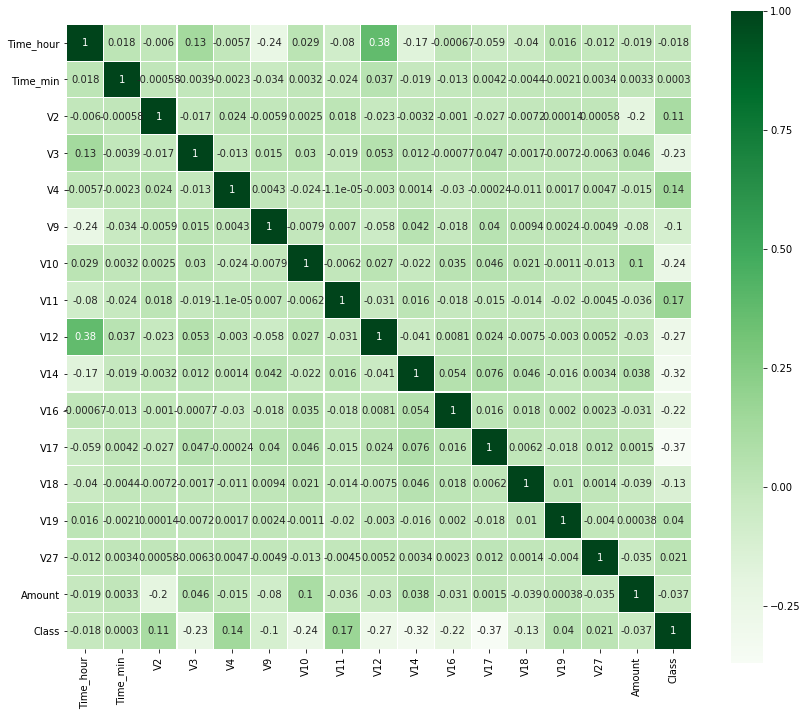

In [32]:
colormap = plt.cm.Greens

plt.figure(figsize=(14,12))

sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap = colormap, linecolor='white', annot=True)
plt.show()

In [33]:
from imblearn.pipeline import make_pipeline as make_pipeline_imb # To do our transformation in a unique time
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [76]:

df.isna()
df.dropna()
#df = df.reset_index()
#col_mean = np.nanmean(df, axis=0)
#print(col_mean)

#Find indicies that you need to replace
#inds = np.where(np.isnan(df))

#Place column means in the indices. Align the arrays using take
#df[inds] = np.take(col_mean, inds[1])


print(df)
import pandas as pd

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
#df.dropna(axis='columns')
#df.dropna(axis='rows')
#X = X.as_matrix().astype(np.float)
#y = y.as_matrix().astype(np.float)

df = clean_dataset(df)

print(df)

X = df.drop(["Class"], axis=1).values #Setting the X to do the split
y = df["Class"].values # transforming the values in array

#df.head()
#df.info()

         level_0     index  Time_hour  ...       V27    Amount  Class
0            0.0       0.0        0.0  ...  0.133558  1.611257    0.0
1            1.0       1.0        0.0  ... -0.008983 -0.009129    0.0
2            2.0       2.0        0.0  ... -0.055353  1.781312    0.0
3            3.0       3.0        0.0  ...  0.062723  1.572203    0.0
4            4.0       4.0        0.0  ...  0.219422  1.446770    0.0
5            5.0       5.0        0.0  ...  0.253844  0.263490    0.0
6            6.0       6.0        0.0  ...  0.034507  0.475387    0.0
7            7.0       7.0        0.0  ... -1.206921  1.310953    0.0
8            8.0       8.0        0.0  ...  0.011747  1.511992    0.0
9            9.0       9.0        0.0  ...  0.246219  0.265578    0.0
10          10.0      10.0        0.0  ...  0.042850  0.720398    0.0
11          11.0      11.0        0.0  ...  0.042472  0.834076    0.0
12          12.0      12.0        0.0  ...  0.026416  1.568808    0.0
13          13.0    

In [77]:
# function to better evaluate the model
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))

# splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.20)

classifier = RandomForestClassifier

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), classifier(random_state=42))

smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

#Showing the diference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_sample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


normal data distribution: Counter({0.0: 205227, 1.0: 358})
SMOTE data distribution: Counter({0.0: 205227, 1.0: 205227})


In [78]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, smote_prediction))

print('\nSMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))

print_results("\nSMOTE + RandomForest classification", y_test, smote_prediction)

Confusion Matrix: 
[[41050     3]
 [   12    52]]

SMOTE Pipeline Score 0.9996351873920762

SMOTE + RandomForest classification
accuracy: 0.9996351873920762
precision: 0.9454545454545454
recall: 0.8125
f2: 0.8360128617363346


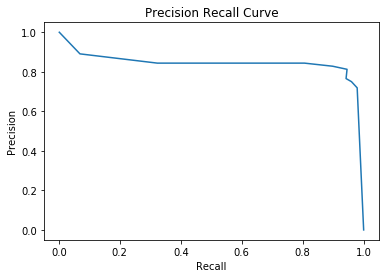

In [79]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = smote_pipeline.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()


In [81]:
# overfitting ROC curve above
!pip install -U scikit-learn


Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.21.3)


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  KFold, cross_val_score, train_test_split
#from sklearn.cross_validation import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV


In [0]:
#params of the model
param_grid = {"max_depth": [3,5, None],
              "n_estimators":[3,5,10],
              "max_features": [5,6,7,8]}

# Creating the classifier
model = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, verbose=1 )

In [86]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy', max_depth=2,
                                              max_features=3,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=1,
                                              oob_score=False, random_state=3,
                                              verbose=1, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [

In [87]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8199291434841035
{'max_depth': None, 'max_features': 7, 'n_estimators': 5}


In [88]:
# Running the fit
rf = RandomForestClassifier(max_depth=5, max_features = 7, n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
# Printing the Training Score
print("Training score data: ")
print(rf.score(X_train, y_train))

Training score data: 
0.9996655884427366


In [90]:
#Testing the model 
#Predicting by X_test
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print_results("RF classification", y_test, y_pred)

[[41049     4]
 [   11    53]]
RF classification
accuracy: 0.9996351873920762
precision: 0.9298245614035088
recall: 0.828125
f2: 0.8466453674121405


In [0]:

#Feature importance plot
#features = ["Time_min", 'Time_hours',"V2","V3","V4","V9","V10","V11","V12","V14","V16","V17","V18","V19","V27","Amount"]

# Credits to Gabriel Preda
# https://www.kaggle.com/gpreda/credit-card-fraud-detection-predictive-models
#plt.figure(figsize = (9,5))

#feat_import = pd.DataFrame({'Feature': features, 'Feature importance': rf.feature_importances_})
#feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

#g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
#g.set_xticklabels(g.get_xticklabels(),rotation=90)
#g.set_title('Features importance - Random Forest',fontsize=20)
#plt.show() 



In [92]:
# Modelling Logistic Regression with Hyper Parameters
param_grid = {'C': [0.01, 0.1, 1, 10],
             'penalty':['l1', 'l2']}

logreg = LogisticRegression(random_state=2)

grid_search_lr = GridSearchCV(logreg, param_grid=param_grid, scoring='recall', cv=5)

grid_search_lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=2, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [93]:
# The best recall obtained
print(grid_search_lr.best_score_)
#Best parameter on trainning set
print(grid_search_lr.best_params_)

0.5752760148879934
{'C': 0.1, 'penalty': 'l1'}


In [94]:
# setting up best Parameters
# Creating the model 
logreg = LogisticRegression(C=10, penalty='l2',random_state=2)

#Fiting the model
logreg.fit(X_train, y_train)
           
# Printing the Training Score
print("Cross Validation of X and y Train: ")
print(cross_val_score(logreg,X_train, y_train, cv=5, scoring='recall'))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cross Validation of X and y Train: 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[0.42372881 0.54237288 0.44067797 0.47457627 0.75862069]


In [98]:
# Predicting with the best params
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print("")
print_results("LogReg classification", y_test, y_pred)

[[41049     4]
 [   38    26]]

LogReg classification
accuracy: 0.9989785246978136
precision: 0.8666666666666667
recall: 0.40625
f2: 0.4545454545454546


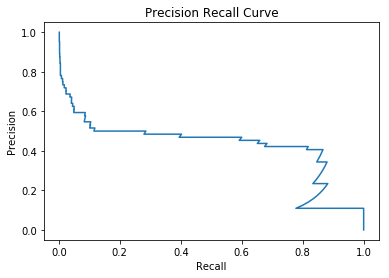

In [96]:
#Predicting proba
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()